In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
X = train_data.drop(columns=["PassengerId"])
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Data Cleaning & Preprocessing:


In [4]:
# Espansione della feature Cabin: 
new = X["Cabin"].str.split("/", n=-1, expand=True)
X["Deck"] = new[0] # Aggiungo la colonna Deck
X["Num"] = new[1]  # Aggiungo la colonna Num
X["Side"] = new[2] # Aggiungo la colonna Side
X.drop(columns=["Cabin"], inplace=True)
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [5]:
# Verifica della percentuale di valori mancanti per ogni feature:
percentuali_nan = X.isnull().sum()/len(X)*100
print(percentuali_nan)

# Gestione dei valori mancanti:
X.dropna(inplace=True) # Remove rows
y = X["Transported"]

features = ["HomePlanet","CryoSleep","Destination","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Deck","Num","Side"]
X = X[features]
X = pd.get_dummies(X,columns=["HomePlanet","Destination","Deck","Side"])


HomePlanet      2.312205
CryoSleep       2.496261
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
Deck            2.289198
Num             2.289198
Side            2.289198
dtype: float64


In [6]:
# Standardizzazione della matrice X:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nd_X_scaled = scaler.fit_transform(X)
pd_X_scaled = pd.DataFrame(nd_X_scaled, columns=X.columns)
pd_X_scaled.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,-0.738664,0.695413,-0.158555,-0.345756,-0.285355,-0.309494,-0.273759,-0.269534,-1.167051,-1.083063,...,-0.179858,3.085305,-0.312289,-0.244975,-0.339578,-0.695098,-0.652578,-0.017402,1.012798,-1.012798
1,-0.738664,-0.336769,-0.158555,-0.176748,-0.279993,-0.266112,0.206165,-0.230494,-1.167051,0.923307,...,-0.179858,-0.324117,-0.312289,-0.244975,-0.339578,1.438646,-0.652578,-0.017402,-0.987364,0.987364
2,-0.738664,2.002842,6.306963,-0.279083,1.845163,-0.309494,5.596357,-0.226058,-1.167051,-1.083063,...,5.559950,-0.324117,-0.312289,-0.244975,-0.339578,-0.695098,-0.652578,-0.017402,-0.987364,0.987364
3,-0.738664,0.282540,-0.158555,-0.345756,0.479034,0.334285,2.636384,-0.098291,-1.167051,-1.083063,...,5.559950,-0.324117,-0.312289,-0.244975,-0.339578,-0.695098,-0.652578,-0.017402,-0.987364,0.987364
4,-0.738664,-0.887266,-0.158555,0.124056,-0.243650,-0.047470,0.220152,-0.267759,-1.165103,0.923307,...,-0.179858,-0.324117,-0.312289,-0.244975,-0.339578,1.438646,-0.652578,-0.017402,-0.987364,0.987364


In [7]:
# Principal Component Analysis:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(nd_X_scaled)
print(X_pca)
print(f"Explained variance: {pca.explained_variance_ratio_}")
print(f"Cumulative: {np.cumsum(pca.explained_variance_ratio_)}")

[[ 2.26503729  0.14157258]
 [-0.76033368  0.53327392]
 [ 5.18912156  0.45569082]
 ...
 [-1.89018087 -0.39776434]
 [ 2.65159973 -0.66421321]
 [ 1.97109915  0.67852982]]
Explained variance: [0.15098537 0.10369135]
Cumulative: [0.15098537 0.25467673]


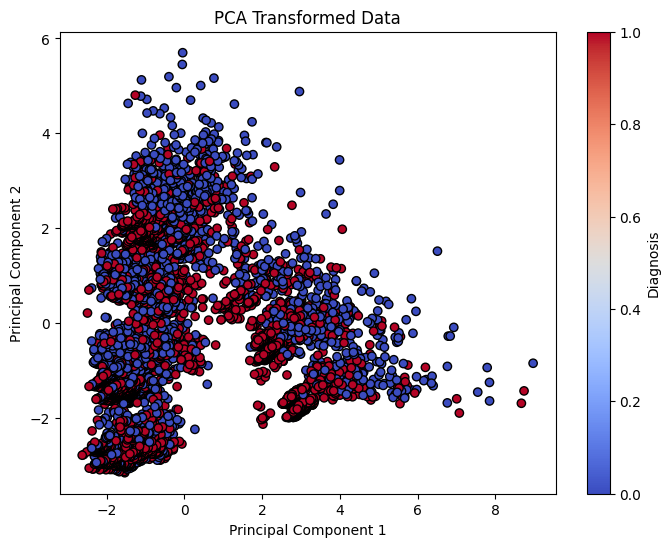

In [9]:
# Plot della PCA:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
plt.colorbar(label="Diagnosis")
plt.show()